In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [617]:
diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [618]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [619]:
X = diabetes.drop(columns = ['Outcome'])
Y = diabetes['Outcome']

print('Shape of X : ', X.shape)
print('Shape of Y : ', Y.shape)

Shape of X :  (768, 8)
Shape of Y :  (768,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [622]:
print('Shape of X_train : ', X_train.shape)
print('Shape of Y_train : ', Y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of Y_test : ', Y_test.shape)

Shape of X_train :  (576, 8)
Shape of Y_train :  (576,)
Shape of X_test :  (192, 8)
Shape of Y_test :  (192,)


In [0]:
def standardize_predictors(X_train, X_test):
  X_train = np.asarray(X_train, dtype=np.float64)
  X_test = np.asarray(X_test, dtype=np.float64)
  mean = np.mean(X_train, axis = 0)
  std = np.std(X_train, axis = 0)
  print(mean)
  print(std)
  X_train = (X_train - mean)/std
  X_test = (X_test - mean)/std
  return X_train, X_test

In [624]:
X_train, X_test = standardize_predictors(X_train, X_test)

[  3.79166667 121.05381944  69.48611111  21.05902778  84.23611111
  32.04427083   0.4775      33.03125   ]
[  3.28057202  32.20090286  18.36237704  16.05762156 119.17049738
   8.02152065   0.33845536  11.77991445]


In [625]:
#Vectorization for logistic regression from scratch
feature_train = X_train.T
feature_test = X_test.T

label_train = np.asarray(Y_train).reshape(-1,1).T
label_test = np.asarray(Y_test).reshape(-1,1).T

print('Shape of training features : ', feature_train.shape)
print('Shape of testing features : ', feature_test.shape)
print('Shape of training labels : ', label_train.shape)
print('Shape of testing labels : ', label_test.shape)

Shape of training features :  (8, 576)
Shape of testing features :  (8, 192)
Shape of training labels :  (1, 576)
Shape of testing labels :  (1, 192)


In [0]:
##Definignt the activation function (using sigmoid here)

def sigmoid(z):
  sig = 1/(1+np.exp(-z))
  return sig

In [0]:
#Random initialization of parameters (starting with 0)
def initialize_parameters(feature_size):

  #w = np.random.randn(feature_size, 1)*0.01
  w = np.zeros((feature_size, 1))
  b = 0
  return w, b

In [0]:
#Find the cost function using gradient descent and evaluate gradient values

def forward_propagate(w, b, X, Y):
  sample_size = X.shape[1]
  A = sigmoid(np.dot(w.T, X) + b)
  np.seterr(divide = 'ignore')
  cost = (-1/sample_size)*np.sum(Y*np.log(A) + (1-Y)*(np.log(1-A)))

  #Gradient calculation
  dw = (1/sample_size)*np.dot(X, (A-Y).T)
  db = (1/sample_size)*np.sum(A-Y)

  grads = {'dw':dw,
           'db':db}

  return grads, cost

In [0]:
#Optimize the coefficients for cost-reduction

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
  costs = []
  for i in range(num_iterations):
    grads, cost = forward_propagate(w, b, X, Y)

    dw = grads['dw']
    db = grads['db']

    w = w - learning_rate*dw
    b = b - learning_rate*db

    if i%100 == 0:
      costs.append(cost)

    if((print_cost) and (i % 100 == 0)):
      print('Cost after ith iteration %i: %f' % (i, cost))
  params = {'w':w,
            'b':b}

  grads = {'dw':dw,
           'db':db}

  return params, grads, costs

In [0]:
def predict(w, b, X):
  Y_predict = np.zeros((1, X.shape[1]))
  w = w.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(w.T, X) + b)

  for i in range(A.shape[1]):
    if(A[0,i] <= 0.5):
      Y_predict[0,i] = 0
    else:
      Y_predict[0,i] = 1
  return Y_predict

In [0]:
#Merging all the functions to create one model

def Logistic_Regression_Model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.03, print_cost = True):
  w, b = initialize_parameters(X_train.shape[0])
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
  w = parameters['w']
  b = parameters['b']

  Y_predict_test = predict(w, b, X_test)
  Y_predict_train = predict(w, b, X_train)

  print('Test set accuracy : {} %'.format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))
  final_values = {"costs": costs,
                  "Y_prediction_test": Y_predict_test, 
                  "Y_prediction_train" : Y_predict_train, 
                  "w" : w, 
                  "b" : b,
                  "learning_rate" : learning_rate,
                  "num_iterations": num_iterations}
  return final_values

In [632]:
final_values = Logistic_Regression_Model(feature_train, label_train, feature_test, label_test, num_iterations = 5000, learning_rate = 0.05, print_cost = False)

Test set accuracy : 75.52083333333334 %


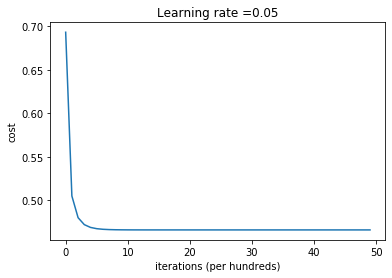

In [633]:
# Plot learning curve (with costs)
costs = np.squeeze(final_values['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(final_values["learning_rate"]))
plt.show()

learning rate is: 0.01
Test set accuracy : 75.52083333333334 %

-------------------------------------------------------

learning rate is: 0.001
Test set accuracy : 76.04166666666666 %

-------------------------------------------------------

learning rate is: 0.0001
Test set accuracy : 72.91666666666667 %

-------------------------------------------------------



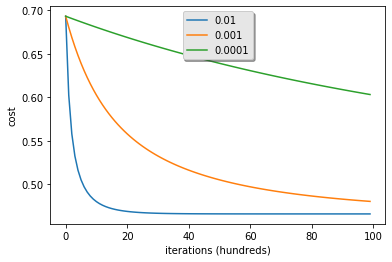

In [634]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = Logistic_Regression_Model(feature_train, label_train, feature_test, label_test, num_iterations = 10000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()